In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
sns.reset_orig()
sc.settings._vector_friendly = True
# p9.theme_set(p9.theme_classic)
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["savefig.transparent"] = True
plt.rcParams["figure.figsize"] = (4, 4)

plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.titleweight"] = 500
plt.rcParams["axes.titlepad"] = 8.0
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = 500
plt.rcParams["axes.linewidth"] = 1.2
plt.rcParams["axes.labelpad"] = 6.0
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

plt.rcParams["font.size"] = 11
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica', "Computer Modern Sans Serif", "DejaVU Sans"]
plt.rcParams['font.weight'] = 500

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['xtick.minor.size'] = 1.375
plt.rcParams['xtick.major.size'] = 2.75
plt.rcParams['xtick.major.pad'] = 2
plt.rcParams['xtick.minor.pad'] = 2

plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['ytick.minor.size'] = 1.375
plt.rcParams['ytick.major.size'] = 2.75
plt.rcParams['ytick.major.pad'] = 2
plt.rcParams['ytick.minor.pad'] = 2

plt.rcParams["legend.fontsize"] = 12
plt.rcParams['legend.handlelength'] = 1.4
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 3
plt.rcParams['legend.frameon'] = False

plt.rcParams['lines.linewidth'] = 1.7

DPI = 300

# Step 0: get UMAP

In [3]:
path = "/home/ubuntu/simu_runs/run_B"

sc_adata = sc.read_h5ad(path+"/sc_simu.h5ad")
st_adata = sc.read_h5ad(path+"/st_simu.h5ad")

In [101]:
sc_adata.raw = sc_adata

In [102]:
for i in range(5):
    st_adata.obs[f"Cell Type {i}"] = st_adata.obsm["cell_type"][:, i]

for i in range(4):
    st_adata.obs[f"Gamma {i}"] = st_adata.obsm["gamma"][:, i]
    st_adata.obs[f"Gene {i}"] = st_adata.X[:, i].A

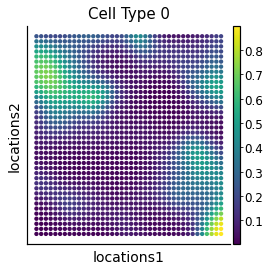

In [103]:
sc.pl.embedding(st_adata, basis="locations", color="Cell Type 0")

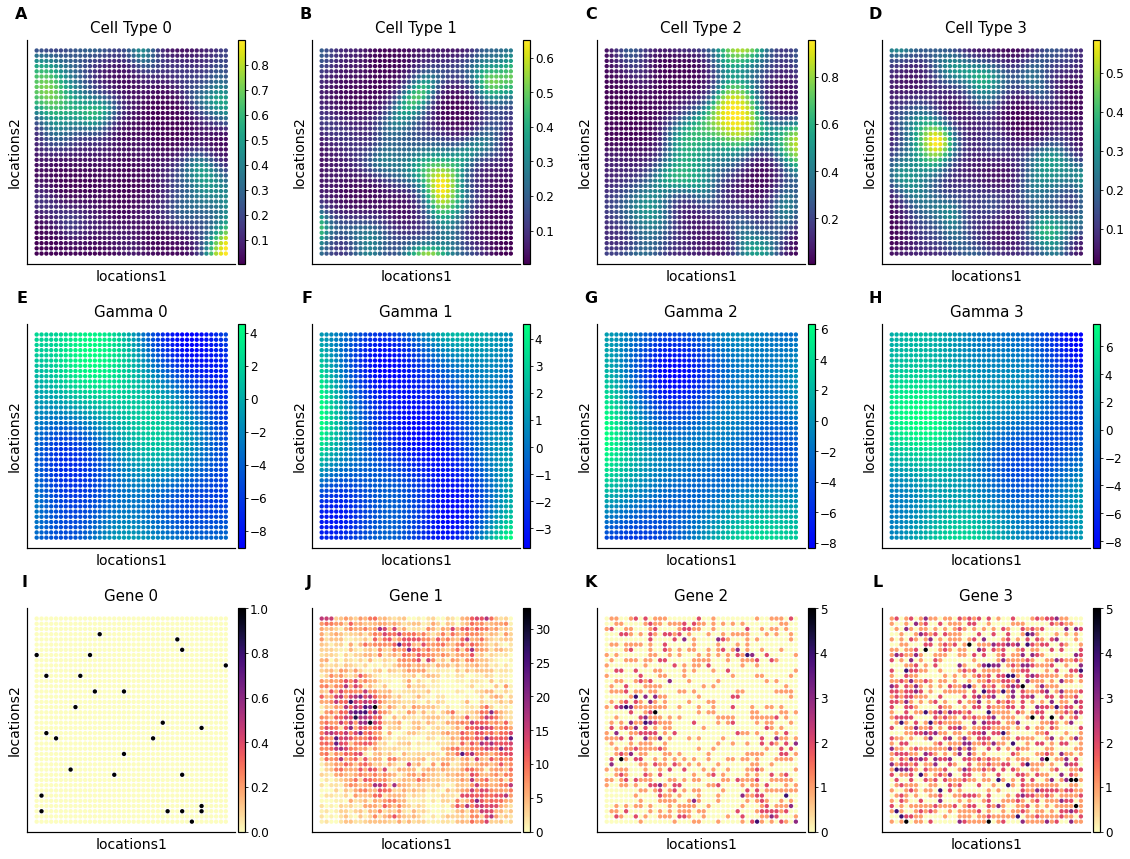

In [104]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

sc.pl.embedding(st_adata, basis="locations", color="Cell Type 0", ax=axes[0, 0], show=False)
sc.pl.embedding(st_adata, basis="locations", color="Cell Type 1", ax=axes[0, 1], show=False)
sc.pl.embedding(st_adata, basis="locations", color="Cell Type 2", ax=axes[0, 2], show=False)
sc.pl.embedding(st_adata, basis="locations", color="Cell Type 3", ax=axes[0, 3], show=False)

sc.pl.embedding(st_adata, basis="locations", color="Gamma 0", ax=axes[1, 0], show=False, cmap="winter")
sc.pl.embedding(st_adata, basis="locations", color="Gamma 1", ax=axes[1, 1], show=False, cmap="winter")
sc.pl.embedding(st_adata, basis="locations", color="Gamma 2", ax=axes[1, 2], show=False, cmap="winter")
sc.pl.embedding(st_adata, basis="locations", color="Gamma 3", ax=axes[1, 3], show=False, cmap="winter")

sc.pl.embedding(st_adata, basis="locations", color="Gene 0", ax=axes[2, 0], show=False, cmap="magma_r")
sc.pl.embedding(st_adata, basis="locations", color="Gene 1", ax=axes[2, 1], show=False, cmap="magma_r")
sc.pl.embedding(st_adata, basis="locations", color="Gene 2", ax=axes[2, 2], show=False, cmap="magma_r")
sc.pl.embedding(st_adata, basis="locations", color="Gene 3", ax=axes[2, 3], show=False, cmap="magma_r")

for i, slice_axes in enumerate(axes):
    for j, ax in enumerate(slice_axes):
        ax.text(0, 1.15, letters[4 * i+ j] , transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.show()

In [105]:
sc.pp.normalize_total(sc_adata, target_sum=1e5)
sc.pp.log1p(sc_adata)
sc.tl.pca(sc_adata, svd_solver='arpack', n_comps=100)
sc.pp.neighbors(sc_adata, n_neighbors=10, n_pcs=100)
sc.tl.umap(sc_adata)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [106]:
sc_adata.obs["cell_type_string"] = [str(i) for i in sc_adata.obs["cell_type"]]
sc_adata.obs["4th_sub-cell_type_string"] = [str(i) for i in sc_adata.obs["4th_sub-cell_type"]]
sc_adata.obs["8th_sub-cell_type_string"] = [str(i) for i in sc_adata.obs["8th_sub-cell_type"]]

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  foldchanges[global_indices]


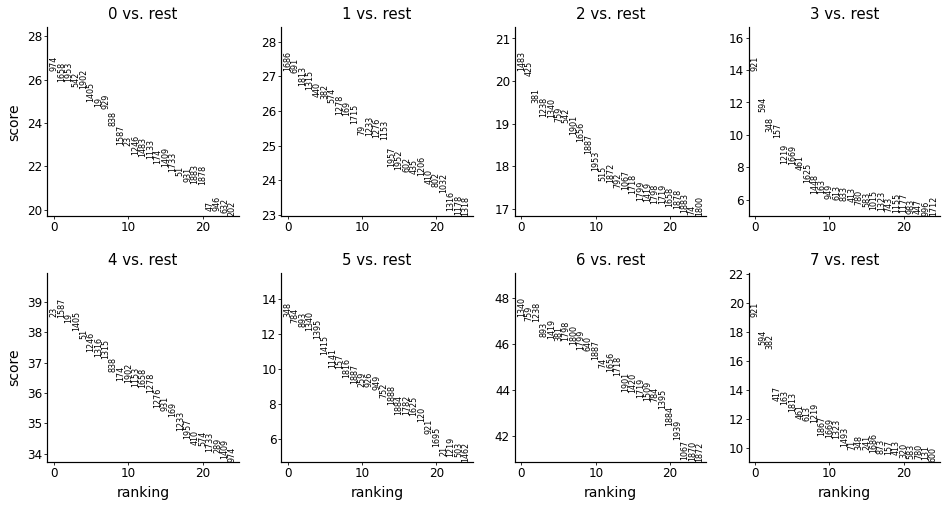

In [195]:
sc.tl.rank_genes_groups(adata, '8th_sub-cell_type_string', method='wilcoxon', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/ipykernel/__main__.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


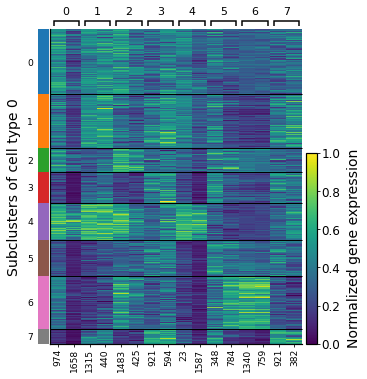

In [237]:
ind_ = ["974", "1658", "1315", "440", 
                           "1483", "425", "921", "594", 
                           "23", "1587", "348", "784",
                          "1340", "759", "921", "382"]
ax = sc.pl.heatmap(adata, ind_, 
                     groupby="8th_sub-cell_type_string", standard_scale="var", show=False,
                  var_group_positions=[[i, i+1] for i in (0, 2, 4, 6, 8, 10, 12, 14)],
                          var_group_labels=[f'{i}' for i in range(8)])
ax["groupby_ax"].set_ylabel("Subclusters of cell type 0")
ax["heatmap_ax"].images[-1].colorbar.ax.set_ylabel("Normalized gene expression")
plt.tight_layout()
plt.show()


In [241]:
((components_[0][:, [int(x) for x in ind_]] > 0).sum(0) > 0).sum()

12

... storing 'cell_type_string' as categorical
... storing '4th_sub-cell_type_string' as categorical


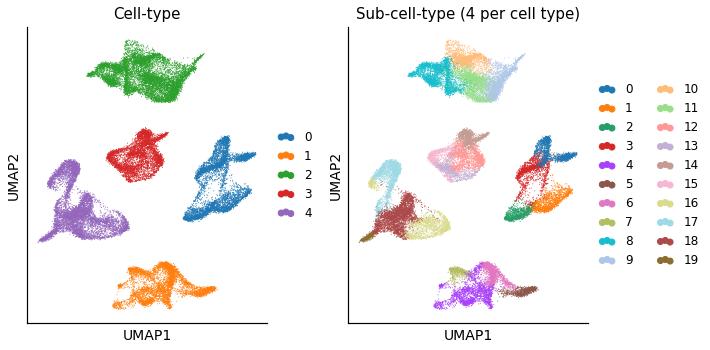

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sc.pl.umap(sc_adata, color=["cell_type_string"], cmap="tab20", ax=axs[0], show=False)
axs[0].set_title("Cell-type")
sc.pl.umap(sc_adata, color=["4th_sub-cell_type_string"], cmap="tab20", ax=axs[1], show=False)
axs[1].set_title("Sub-cell-type (4 per cell type)")
plt.tight_layout()
plt.savefig("figures/simu_umap.pdf", dpi=DPI)

In [46]:
sc_adata.n_obs

32000

# step 1: fetch results for main destvi and other methods

In [35]:
path = "/home/ubuntu/simu_runs/run_B"
list_dir = ["destvi_latent",
            "harmony", "scanorama", "scvi",
            "stereo0", "stereo1", "stereo2", "stereo3", #"stereo4",
            "RCTD0", "RCTD1", "RCTD2", "RCTD3", #"RCTD4",
            "spotlight0", "spotlight1", "spotlight2",
            "seurat0", "seurat1", "seurat2", "seurat3",] #"seurat4"]
#             "cell2location0", "cell2location1", "cell2location2", "cell2location3"]
list_text = ["DestVI",
            "Harmony", "Scanorama", "scVI",
            "Stereoscope", "Stereoscope (2)", "Stereoscope (4)", "Stereoscope (8)", # "Stereoscope (16)",
            "RCTD", "RCTD (2)", "RCTD (4)", "RCTD (8)", #"RCTD (16)",
            "SPOTlight", "SPOTlight (2)", "SPOTlight (4)",
            "Seurat", "Seurat (2)", "Seurat (4)", "Seurat (8)", ]#"Seurat (16)"]
#             "cell2location", "cell2location (2)", "cell2location (4)", "cell2location (8)"]

list_colors = ["darkturquoise",
              "gold", "orange", "peru", 
              "lightcoral", "indianred", "brown", "firebrick", #"firebrick",
              "springgreen", "limegreen", "lightgreen", "green", #"green",
              "thistle", "plum", "violet", #"purple",
              "lightsteelblue", "cornflowerblue", "royalblue", "mediumblue",] #"blue"]
#               "peachpuff", "sandybrown", "chocolate", "saddlebrown"]
list_markers = ["X",
              "X", "X", "X",
              "o", "^", "s", "p", #"1",
               "o", "^", "s", "p",# "1",
               "o", "^", "s",
              "o", "^", "s", "p",] #"1",]
#                "o", "^", "s", "p"]

dir_results = {}
for directory in list_dir:
        dir_results[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)

In [36]:
dir_results["RCTD2"]

,ct0,ct1,ct2,ct3,ct4,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,allct,proportions
avg_spearman,0.567868,0.755053,0.787742,0.290959,0.786943,0.881531,0.432984,0.357392,0.427972,0.035057,0.462607,0.938583
avg_pearson,0.586930,0.850281,0.783634,0.312363,0.838518,0.934223,0.450409,0.410141,0.429821,0.060360,0.495117,0.953126
w_spearman,0.604939,0.850196,0.826685,0.483369,0.830863,0.939870,0.615794,0.868802,0.769605,0.449256,0.872482,0.942944
w_pearson,0.688777,0.939021,0.823174,0.499976,0.877648,0.965721,0.677665,0.946460,0.783506,0.466276,0.908842,0.956952
iw_spearman,0.484074,0.608469,0.738142,0.211903,0.721764,0.900393,NaN,NaN,NaN,NaN,NaN,0.934319
iw_pearson,0.441402,0.691940,0.738822,0.230918,0.774684,0.944442,NaN,NaN,NaN,NaN,NaN,0.949355
median_l1,0.401668,0.724090,0.426414,2.027316,1.254497,0.029832,0.125386,0.012254,0.014793,0.194453,0.031571,0.030613
mse,140.876861,30.801600,23.037456,282.306049,55.397479,66.062212,124.165325,24.234597,18.259273,186.088990,36.658992,0.054688
w_median_l1,880.577666,51.638879,110.784629,1147.044315,385.212171,145.498385,776.617615,81.596103,96.795619,1133.055716,215.371581,0.032465
w_mse,1702.632137,143.456522,263.208119,2117.672727,784.538784,631.400465,1491.949754,223.220790,194.895882,2079.745167,501.315495,0.056089


In [37]:
dir_results["scvi"]

,ct0,ct1,ct2,ct3,ct4,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,allct,proportions
avg_spearman,0.552224,0.300672,0.208757,0.233309,0.541267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.646156
avg_pearson,0.555072,0.322357,0.207554,0.246912,0.573198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.723245
median_l1,0.389547,0.887502,0.783740,2.247226,1.174427,0.146004,0.152414,0.085745,0.116869,0.297307,0.188678,0.132624
mse,109.598331,34.000111,32.154631,359.834281,38.580348,61.800994,97.257279,31.201840,24.753632,236.118363,26.538828,0.274429


In [38]:
dir_results["destvi_latent"]

,ct0,ct1,ct2,ct3,ct4,ct_long0,ct_long1,ct_long2,ct_long3,ct_long4,allct,proportions
avg_spearman,0.851813,0.708152,0.808716,0.650069,0.798131,0.858298,0.000000,0.000000,0.000000,0.000000,0.000000,0.937455
avg_pearson,0.850551,0.718934,0.810935,0.652402,0.832120,0.973849,0.000000,0.000000,0.000000,0.000000,0.000000,0.958358
median_l1,0.189799,0.629602,0.371830,1.325142,0.728302,0.073290,0.072904,0.041085,0.050768,0.268647,0.103552,0.029894
mse,107.579656,31.793534,75.570735,580.109937,34.801540,91.811200,96.527151,55.615339,56.557836,380.000204,60.801126,0.051622


In [39]:
# gather cell-type info
ct_score = []
for k in dir_results.keys():
    ct_score.append(dir_results[k]["proportions"])
ct_score = pd.concat(ct_score, axis=1)
ct_score.columns = list_text

# gather within-cell type info (e.g., ct0)
gimp_ct_score = []
for k in dir_results.keys():
    gimp_ct_score.append(dir_results[k][["ct" + str(i) for i in range(5)]].mean(1))
gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
gimp_ct_score.columns = list_text

In [40]:
ct_score

,DestVI,Harmony,Scanorama,scVI,Stereoscope,Stereoscope (2),Stereoscope (4),Stereoscope (8),RCTD,RCTD (2),RCTD (4),RCTD (8),SPOTlight,SPOTlight (2),SPOTlight (4),Seurat,Seurat (2),Seurat (4),Seurat (8)
avg_spearman,0.937455,0.492009,0.545408,0.646156,0.790525,0.846433,0.876903,0.893031,0.917812,0.934842,0.938583,0.942100,0.889659,0.897251,0.858063,0.776605,0.776445,0.776510,0.776492
avg_pearson,0.958358,0.535268,0.626596,0.723245,0.782549,0.873084,0.914401,0.920435,0.934565,0.947955,0.953126,0.955574,0.912488,0.921920,0.898574,0.805990,0.805990,0.805990,0.805990
median_l1,0.029894,0.150474,0.144883,0.132624,0.062646,0.054372,0.046524,0.048380,0.036749,0.032612,0.030613,0.031806,0.081820,0.069901,0.082377,0.108127,0.108127,0.108127,0.108127
mse,0.051622,0.357606,0.312888,0.274429,0.123800,0.095629,0.082012,0.089306,0.068000,0.058589,0.054688,0.054684,0.138294,0.123505,0.150518,0.224167,0.224167,0.224167,0.224167
w_spearman,NaN,NaN,NaN,NaN,0.797635,0.847952,0.882011,0.894841,0.923448,0.939306,0.942944,0.946674,0.893701,0.902659,0.865771,0.785916,0.785706,0.785798,0.785777
w_pearson,NaN,NaN,NaN,NaN,0.793755,0.875122,0.916560,0.922026,0.938228,0.951971,0.956952,0.959150,0.917160,0.926633,0.904623,0.815045,0.815045,0.815045,0.815045
iw_spearman,NaN,NaN,NaN,NaN,0.783904,0.845031,0.872291,0.891635,0.912367,0.930536,0.934319,0.937758,0.885901,0.892250,0.851030,0.768577,0.768461,0.768501,0.768486
iw_pearson,NaN,NaN,NaN,NaN,0.772531,0.871318,0.912579,0.919199,0.931013,0.944076,0.949355,0.952092,0.908217,0.917513,0.892846,0.797735,0.797735,0.797735,0.797735
w_median_l1,NaN,NaN,NaN,NaN,0.075317,0.060171,0.050107,0.051322,0.038199,0.034415,0.032465,0.032279,0.099805,0.085203,0.097938,0.114972,0.114972,0.114972,0.114972
w_mse,NaN,NaN,NaN,NaN,0.127643,0.098406,0.084218,0.090788,0.068602,0.060019,0.056089,0.054895,0.142657,0.123847,0.145937,0.224747,0.224747,0.224747,0.224747


In [41]:
gimp_ct_score

,DestVI,Harmony,Scanorama,scVI,Stereoscope,Stereoscope (2),Stereoscope (4),Stereoscope (8),RCTD,RCTD (2),RCTD (4),RCTD (8),SPOTlight,SPOTlight (2),SPOTlight (4),Seurat,Seurat (2),Seurat (4),Seurat (8)
avg_spearman,0.763376,0.342950,0.255134,0.367246,0.000000,0.293323,0.542482,0.600598,0.000000,0.420993,0.637713,0.623957,0.000000,0.208457,0.519230,0.000000,0.460553,0.624815,0.707358
avg_pearson,0.772988,0.362730,0.256080,0.381018,0.000000,0.275110,0.534899,0.614260,0.000000,0.421438,0.674345,0.660932,0.000000,0.214775,0.539772,0.000000,0.477143,0.664253,0.745887
median_l1,0.648935,1.004416,1.547917,1.096488,1.168067,1.162910,1.177883,0.998296,1.168067,1.066986,0.966797,0.873883,1.168067,1.310344,0.974176,1.168067,1.061194,0.954541,0.802113
mse,165.971081,93.760156,173.783604,114.833540,144.004864,144.329333,129.055422,130.537114,144.004864,136.744139,106.483889,127.516027,144.004864,157.585256,96.790707,144.004864,135.484244,97.205848,109.164286
w_spearman,NaN,NaN,NaN,NaN,0.000000,0.370968,0.577126,0.663324,0.000000,0.494519,0.719210,0.646180,0.000000,0.233618,0.552447,0.000000,0.532890,0.703224,0.776778
w_pearson,NaN,NaN,NaN,NaN,0.000000,0.336743,0.569645,0.668408,0.000000,0.484655,0.765719,0.668091,0.000000,0.237482,0.571835,0.000000,0.557332,0.745976,0.808706
iw_spearman,NaN,NaN,NaN,NaN,0.000000,0.188571,0.525819,0.546871,0.000000,0.334427,0.552870,0.537738,0.000000,0.168413,0.478742,0.000000,0.352471,0.548167,0.628280
iw_pearson,NaN,NaN,NaN,NaN,0.000000,0.175335,0.509409,0.561372,0.000000,0.340434,0.575553,0.578026,0.000000,0.168446,0.504173,0.000000,0.357240,0.578709,0.663821
w_median_l1,NaN,NaN,NaN,NaN,696.266336,701.568220,603.139983,621.933499,696.266336,664.054715,515.051532,595.900357,696.266336,746.422487,456.786136,696.266336,651.851343,463.287153,529.567191
w_mse,NaN,NaN,NaN,NaN,1315.860481,1320.769456,1188.530931,1206.204043,1315.860481,1246.557680,1002.301658,1196.096429,1315.860481,1403.604243,891.096034,1315.860481,1238.096526,892.637269,1011.678220


/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


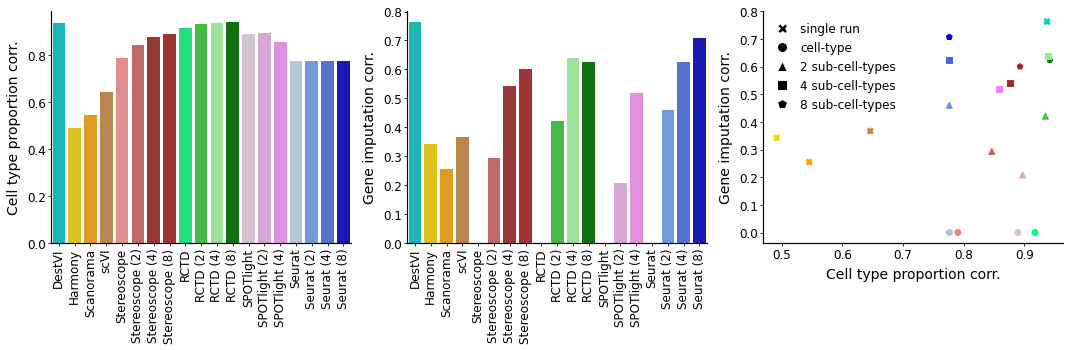

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["avg_spearman"], ax=axes[0], palette=list_colors)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Cell type proportion corr.")
# axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_spearman"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel("Gene imputation corr.")
# axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_spearman"][mask], gimp_ct_score.loc["avg_spearman"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
    
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Cell type proportion corr.")
axes[2].set_ylabel("Gene imputation corr.")

# axes[2].set_xlabel("Spearman corr. of cell type proportion")
# axes[2].set_ylabel("Spearman corr. of gene imputation")
# axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
plt.savefig("figures/benchmarking.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


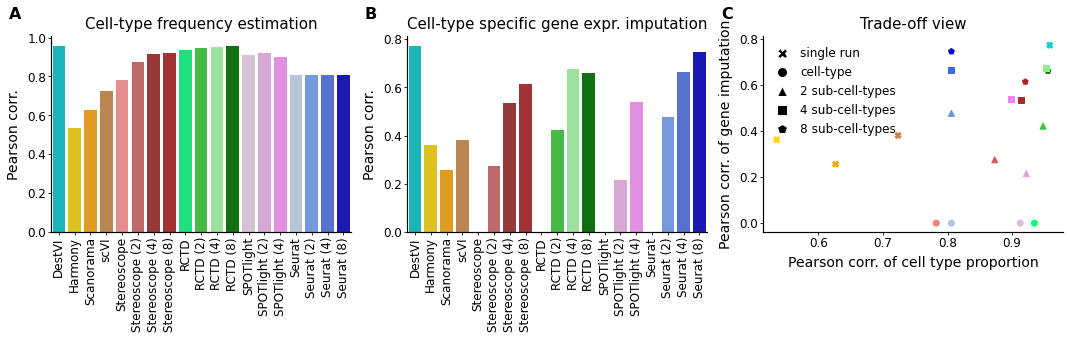

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["avg_pearson"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Pearson corr.")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_pearson"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("Pearson corr.")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["avg_pearson"][mask], gimp_ct_score.loc["avg_pearson"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("Pearson corr. of cell type proportion")
axes[2].set_ylabel("Pearson corr. of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


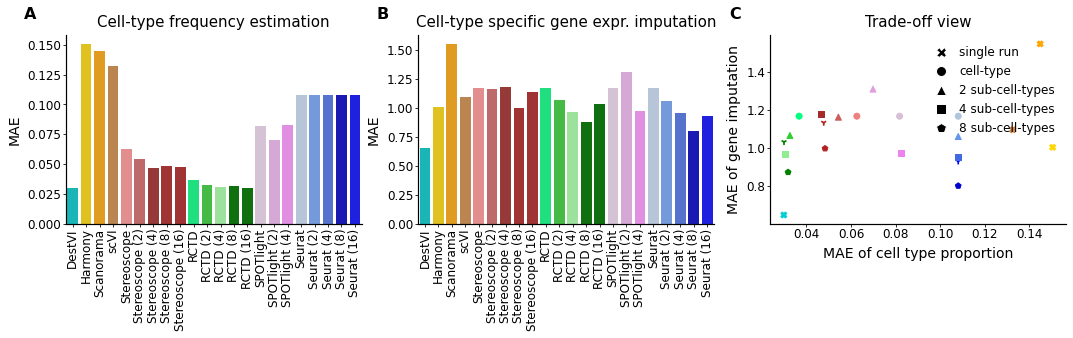

In [139]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.barplot(ct_score.columns, ct_score.loc["median_l1"], ax=axes[0], palette=list_colors)
axes[0].text(-0.1, 1.15, "A", transform=axes[0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("MAE")
axes[0].set_title("Cell-type frequency estimation")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["median_l1"], ax=axes[1], palette=list_colors)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].text(-0.1, 1.15, "B", transform=axes[1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].set_ylabel("MAE")
axes[1].set_title("Cell-type specific gene expr. imputation")

for marker in np.unique(list_markers):
    mask = np.where(np.array(list_markers) == marker)[0]
#     list_colors[mask]
    axes[2].scatter(ct_score.loc["median_l1"][mask], gimp_ct_score.loc["median_l1"][mask], 
                c=np.array(list_colors)[mask], 
                marker=marker)
axes[2].text(-0.1, 1.15, "C", transform=axes[2].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
legend_elements = [Line2D([0], [0], marker='X', color='w', label='single run',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='cell-type',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='2 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='4 sub-cell-types',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='p', color='w', label='8 sub-cell-types',
                          markerfacecolor='black', markersize=10),]
axes[2].set_xlabel("MAE of cell type proportion")
axes[2].set_ylabel("MAE of gene imputation")
axes[2].set_title("Trade-off view")
axes[2].legend(handles=legend_elements)
plt.tight_layout()
# plt.savefig("figures/benchmarking_supp.pdf", dpi=DPI)

# step 2: compare inferential variants of DestVI

In [14]:
list_variants = ["destvi_none", "destvi_latent", "destvi_proportion", "destvi_both"]
list_text = ["None", "Latent", "Proportion", "Both"]
dir_results_destvi = {}
for directory in list_variants:
    dir_results_destvi[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)

In [15]:
# gather cell-type info
ct_score = []
for k in dir_results_destvi.keys():
    ct_score.append(dir_results_destvi[k]["proportions"])
ct_score = pd.concat(ct_score, axis=1)
ct_score.columns = list_text

# gather within-cell type info (e.g., ct0)
gimp_ct_score = []
for k in dir_results_destvi.keys():
    gimp_ct_score.append(dir_results_destvi[k][["ct" + str(i) for i in range(5)]].mean(1))
gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
gimp_ct_score.columns = list_text

In [16]:
ct_score

,None,Latent,Proportion,Both
avg_spearman,0.923792,0.937576,0.871073,0.880754
avg_pearson,0.944263,0.957312,0.900223,0.905601
median_l1,0.033755,0.030336,0.044580,0.046285
mse,0.060004,0.055996,0.107122,0.110821


In [17]:
gimp_ct_score

,None,Latent,Proportion,Both
avg_spearman,0.548017,0.727077,0.522305,0.572987
avg_pearson,0.545559,0.740982,0.506238,0.590772
median_l1,1.197469,1.035438,6.431984,7.627239
mse,219.582284,212.696719,743.632389,798.309582


/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


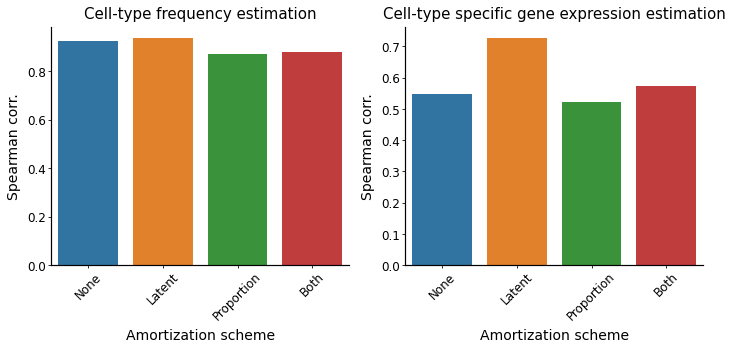

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(ct_score.columns, ct_score.loc["avg_spearman"], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel("Spearman corr.")
axes[0].set_title("Cell-type frequency estimation")
axes[0].set_xlabel("Amortization scheme")


sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_spearman"], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel("Spearman corr.")
axes[1].set_xlabel("Amortization scheme")
axes[1].set_title("Cell-type specific gene expression estimation")
plt.tight_layout()
plt.savefig("figures/variants.pdf", dpi=DPI)

# step3: refined analysis of performance


In [111]:
from numba import jit
import numpy as np
from scipy.stats import spearmanr, pearsonr


#util functions for sampling
def categorical(p, n_samples):
    size = list(p.shape[:-1])
    size.insert(0, n_samples)
    return (p.cumsum(-1) >= np.random.uniform(size=size)[..., None]).argmax(-1).T

@jit(nopython=True)
def get_mean_normal(cell_types, gamma, mean_, components_):
    """
    Util for preparing the mean of the normal distribution.

    cell_types: (n_spots, n_cells)
    gamma: (n_spots, n_cells, n_latent)
    
    return: samples: (n_spots, n_cells, n_genes)
    """
    # extract shapes
    n_spots = gamma.shape[0]
    n_cells = gamma.shape[1]
    n_genes = components_[0].shape[1]
    
    mean_normal = np.zeros((n_spots, n_cells, n_genes))
    for spot in range(n_spots):
        for cell in range(n_cells):
            mean_normal[spot, cell] = mean_[cell_types[spot, cell]]
            c = components_[cell_types[spot, cell]]
            g = np.expand_dims(gamma[spot, cell], 0)
            mean_normal[spot, cell] += np.dot(g, c)[0]
    return mean_normal


def metrics_vector(groundtruth, predicted, scaling=1, feature_shortlist=None):
    res = {}
    if feature_shortlist is not None:
        # shortlist_features
        groundtruth = groundtruth[:, feature_shortlist]
        predicted = predicted[:, feature_shortlist]
    n = predicted.shape[0]
    g = predicted.shape[1]       
    eta = np.random.uniform(0, 1e-10, size=(n,))
    # correlations metrics
    res["avg_spearman"] = np.mean([spearmanr(groundtruth[:, i], predicted[:, i] + eta).correlation for i in range(g)])
    res["avg_pearson"] = np.mean([pearsonr(groundtruth[:, i], predicted[:, i] + eta)[0] for i in range(g)])
    # error metrics
    res["median_l1"] = np.median(np.abs(scaling * groundtruth - scaling * predicted))
    res["mse"] = np.sqrt(np.mean((scaling * groundtruth - scaling * predicted)**2))
    return res

@jit(nopython=True)
def find_location_index_cell_type(locations, cell_type, loc_ref, ct_ref):
    """Return the indices for locations in query only if cell type matches."""
    out_a = [0]
    out_b = [0]
    for i in range(locations.shape[0]):
        for j in range(loc_ref.shape[0]):
            if np.all(locations[i] == loc_ref[j]):
                if cell_type == ct_ref[j]:
                    out_a += [i]
                    out_b += [j]
    return np.array(out_a[1:]), np.array(out_b[1:])

@jit(nopython=True)
def discrete_histogram(data, size):
    """
    Fast histogram in jit, looking at cell type abundance.

    data of shape (n_cells, n_neighbors), must be an integer
    """
    res = np.zeros((data.shape[0], size))
    for n in range(data.shape[0]):
        for k in range(data.shape[1]):
            res[n, data[n, k]] += 1
    return res / data.shape[1]

In [40]:
import os
import numpy as np

import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import anndata

import scvi
from scvi.model import DestVI
from scvi.external import SpatialStereoscope


PCA_path = "input_data/grtruth_PCA.npz"
grtruth_PCA = np.load(PCA_path)
mean_, components_ = grtruth_PCA["mean_"], grtruth_PCA["components_"]

C = components_.shape[0]
D = components_.shape[1]

sc_adata = sc.read_h5ad(path + "/sc_simu.h5ad")
st_adata = sc.read_h5ad(path + "/st_simu.h5ad")

spatial_model = DestVI.load(path+"/destvi_latent/", st_adata)

INFO     .obs[_scvi_batch] not found in target, assuming every cell is same category         
INFO     .obs[_scvi_labels] not found in target, assuming every cell is same category        
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels',     
         'ind_x']                                                                            
INFO     Successfully registered anndata object containing 1600 cells, 2000 vars, 1 batches, 
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


In [113]:
# generic code for benchmarking
s_abundance = st_adata.obsm["cell_type"].reshape((-1))
s_ct = np.vstack(st_adata.n_obs * [np.arange(0, 5)]).reshape((-1))
s_location = np.repeat(st_adata.obsm["locations"], 5, axis=0)
s_gamma = np.repeat(st_adata.obsm["gamma"], 5, axis=0)
s_groundtruth = get_mean_normal(s_ct[:, None], s_gamma[:, None], mean_, components_)[:, 0, :]
s_groundtruth[s_groundtruth < 0] = 0
s_groundtruth = np.expm1(s_groundtruth)
s_groundtruth = s_groundtruth / np.sum(s_groundtruth, axis=1)[:, np.newaxis]

In [114]:
# second get the proportion estimates
agg_prop_estimates = spatial_model.get_proportions(dataset=st_adata).values

In [115]:
# third impute at required locations
# for each cell type, query the model at certain locations and compare to groundtruth
# create a global flush for comparaison across cell types
imputed_expression = np.zeros_like(s_groundtruth)
for ct in range(C):
    indices, _ = find_location_index_cell_type(st_adata.obsm["locations"], ct, 
                                        s_location, s_ct)
    n_location = indices.shape[0]
    ind_x = indices[:, np.newaxis].astype(np.long)
    x = st_adata.X[ind_x[:, 0]].A
    y = ct * np.ones(shape=(n_location, 1), dtype=np.long)
    expression = spatial_model.get_scale_for_ct(x, ind_x, y)

    normalized_expression = expression / np.sum(expression, axis=1)[:, np.newaxis]
    # flush to global
    indices_gt = np.where(s_ct == ct)[0]
    imputed_expression[indices_gt] = normalized_expression

In [116]:
# look at the error as a function of cell type, and of the fraction of cells
# this takes a couple of minutes :(
all_corr = []
for ct in range(0, 5):
    mask = s_ct == ct
    gene_list = np.unique(np.hstack([np.where(components_[ct, i] != 0)[0] for i in range(D)]))
    bins = np.linspace(0, 0.65, 10)
    digitized = np.digitize(s_abundance, bins)
    corr = []
    G = gene_list.shape[0]
    for i in range(10):
        mask_bin = mask * (digitized == i)
        local_corr = 0
        for g in gene_list:
            a = s_groundtruth[mask_bin][:, g]
            b = imputed_expression[mask_bin][:, g]
            local_corr += 1. / G * np.nan_to_num(spearmanr(a, b).correlation)
        corr.append(local_corr)
    all_corr.append(corr)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


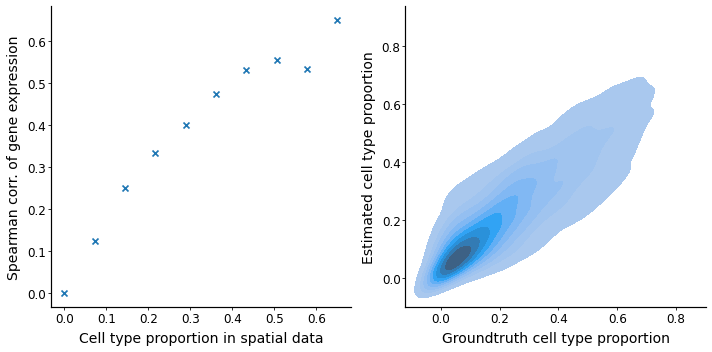

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(bins, np.array(all_corr).mean(0), label="average across all cell-types", marker="x")
axes[0].set_xlabel("Cell type proportion in spatial data")
axes[0].set_ylabel("Spearman corr. of gene expression")

sns.kdeplot(st_adata.obsm["cell_type"].flatten(), agg_prop_estimates.flatten(), fill=True, ax=axes[1])
axes[1].set_xlabel("Groundtruth cell type proportion")
axes[1].set_ylabel("Estimated cell type proportion")
axes[1].set_xlim((-0.12, 0.9))
plt.tight_layout()
plt.savefig("figures/stress_test.pdf", dpi=DPI)

In [47]:
st_adata.obsm["cell_type"].flatten().shape

(8000,)

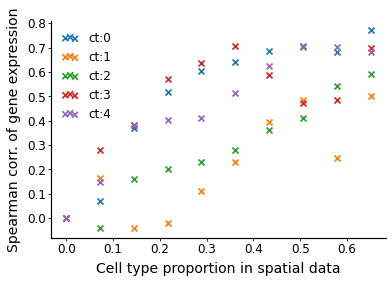

In [120]:
for i in range(5):
    plt.scatter(bins, all_corr[i], label=F"ct:{i}", marker="x")
    plt.xlabel("Cell type proportion in spatial data")
    plt.ylabel("Spearman corr. of gene expression")
    plt.legend()
plt.savefig("stress_test_supplement.pdf", dpi=DPI)

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


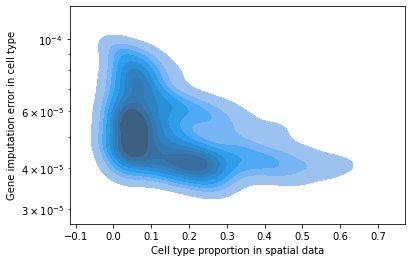

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


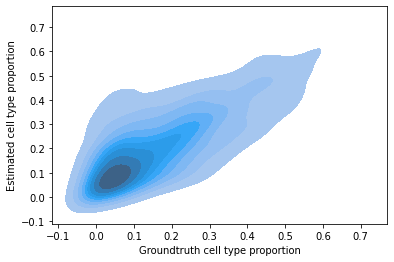

In [215]:
# look at the error as a function of cell type, and of the fraction of cells
ct = 1
mask = s_ct == ct
gene_list = np.unique(np.hstack([np.where(components_[ct, i] != 0)[0] for i in range(D)]))
sns.kdeplot(s_abundance[mask], 
            np.median(np.abs(imputed_expression[mask] - s_groundtruth[mask])[:, gene_list], 1), 
            fill=True, log_scale=(False, True))
plt.xlabel("Cell type proportion in spatial data")
plt.ylabel("Gene imputation error in cell type")
plt.show()

# look at the error as a function of cell type, and of the fraction of cells
sns.kdeplot(st_adata.obsm["cell_type"][:, ct], agg_prop_estimates[:, ct], fill=True)
plt.xlabel("Groundtruth cell type proportion")
plt.ylabel("Estimated cell type proportion")
plt.show()

## Step 4: additional runs for robustness

/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/envs/scVI/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

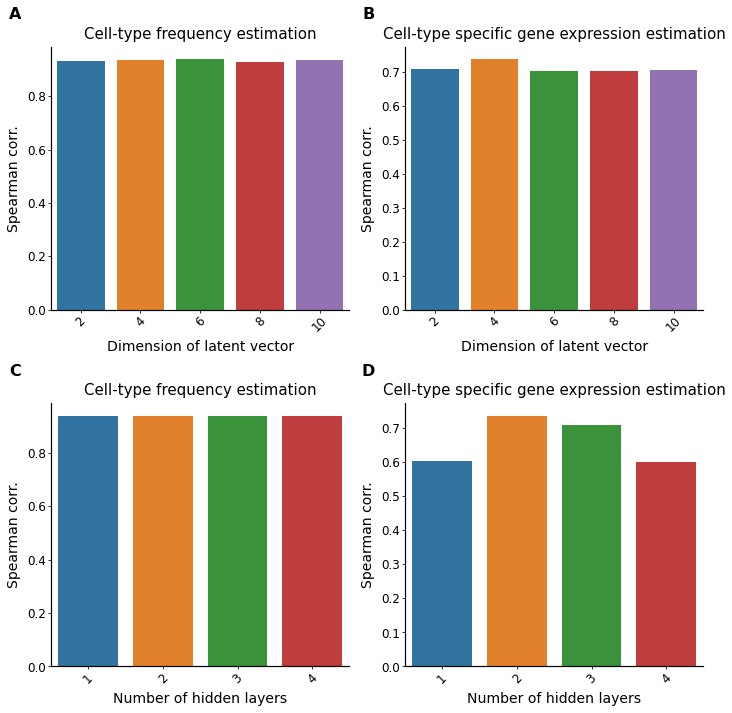

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

list_variants = [f"destvin{i}_latent" for i in [2, 4, 6, 8, 10]]
list_text = [str(i) for i in [2, 4, 6, 8, 10]]
dir_results_destvi_latent = {}
for directory in list_variants:
    dir_results_destvi_latent[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)
    
# gather cell-type info
ct_score = []
for k in dir_results_destvi_latent.keys():
    ct_score.append(dir_results_destvi_latent[k]["proportions"])
ct_score = pd.concat(ct_score, axis=1)
ct_score.columns = list_text

# gather within-cell type info (e.g., ct0)
gimp_ct_score = []
for k in dir_results_destvi_latent.keys():
    gimp_ct_score.append(dir_results_destvi_latent[k][["ct" + str(i) for i in range(5)]].mean(1))
gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
gimp_ct_score.columns = list_text

sns.barplot(ct_score.columns, ct_score.loc["avg_spearman"], ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].set_ylabel("Spearman corr.")
axes[0, 0].set_title("Cell-type frequency estimation")
axes[0, 0].set_xlabel("Dimension of latent vector")

sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_spearman"], ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].set_ylabel("Spearman corr.")
axes[0, 1].set_xlabel("Dimension of latent vector")
axes[0, 1].set_title("Cell-type specific gene expression estimation")

list_variants = [f"destvil{i}_latent" for i in [1, 2, 3, 4]]
list_text = [str(i) for i in [1, 2, 3, 4]]
dir_results_destvi_layer = {}
for directory in list_variants:
    dir_results_destvi_layer[directory] = pd.read_csv(path+f"/{directory}/result.csv", index_col=0)
    
# gather cell-type info
ct_score = []
for k in dir_results_destvi_layer.keys():
    ct_score.append(dir_results_destvi_layer[k]["proportions"])
ct_score = pd.concat(ct_score, axis=1)
ct_score.columns = list_text

# gather within-cell type info (e.g., ct0)
gimp_ct_score = []
for k in dir_results_destvi_layer.keys():
    gimp_ct_score.append(dir_results_destvi_layer[k][["ct" + str(i) for i in range(5)]].mean(1))
gimp_ct_score = pd.concat(gimp_ct_score, axis=1)
gimp_ct_score.columns = list_text

sns.barplot(ct_score.columns, ct_score.loc["avg_spearman"], ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].set_ylabel("Spearman corr.")
axes[1, 0].set_title("Cell-type frequency estimation")
axes[1, 0].set_xlabel("Number of hidden layers")


sns.barplot(gimp_ct_score.columns, gimp_ct_score.loc["avg_spearman"], ax=axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].set_ylabel("Spearman corr.")
axes[1, 1].set_title("Cell-type specific gene expression estimation")
axes[1, 1].set_xlabel("Number of hidden layers")

axes[0, 0].text(-0.1, 1.15, "A", transform=axes[0, 0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[0, 1].text(-0.1, 1.15, "B", transform=axes[0, 1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1, 0].text(-0.1, 1.15, "C", transform=axes[1, 0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
axes[1, 1].text(-0.1, 1.15, "D", transform=axes[1, 1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.tight_layout()